In [1]:
import numpy as np
import scipy.linalg
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def drum_shape(myshape, Lx=1, Ly=1):
    Nx, Ny = myshape.shape
    M = np.zeros([Nx*Ny, Nx*Ny])
    
    #Interval length
    dX = Lx/(Nx-1)
    dY = Ly/(Ny-1)
    
    #Fill M
    for i in range(Nx):
        for j in range(Ny):
            if myshape[i, j] != 0:
                index = i*Ny + j
                M[index, index] = (-2/dX**2-2/dY**2)
                if 0<i:
                    M[index, (i-1)*Ny+(j)] = 1/dX**2
                if 0<j:
                    M[index, (i)*Ny+(j-1)] = 1/dY**2
                if i<Nx-1:
                    M[index, (i+1)*Ny+(j)] = 1/dX**2
                if j<Ny-1:
                    M[index, (i)*Ny+(j+1)] = 1/dY**2
    
    #Compute eigenvalues and eigenvectors
    eigval, eigvect = scipy.linalg.eig(M)
    
    eigval = np.real(eigval)
    eigvect = np.real(eigvect)
    
    not_zero = (eigval!=0)
    eigval = eigval[not_zero]
    eigvect = eigvect[:, not_zero]
    
    #Sort
    idx = np.argsort(np.abs(eigval))
    eigval = eigval[idx]
    eigvect = eigvect[:, idx]
    
    return[eigval, eigvect, M]

In [3]:
#Grid Size
N = 30

#Create grid
grid = np.zeros([N, N])

#create meshgrid
Y_mg, X_mg = np.meshgrid(np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N))

In [4]:
#Define shape
grid[(-1<X_mg)&(X_mg<1)&(-1<Y_mg)&(Y_mg<1)] = 1

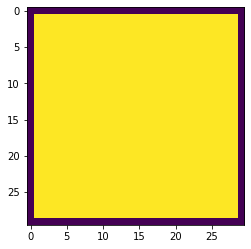

In [5]:
plt.imshow(grid)

In [6]:
[eigval, eigvect, M] = drum_shape(grid, 2, 2)

In [7]:
shape_id = 2

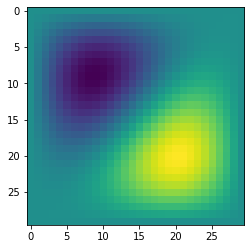

In [8]:
#plot firgure in 2D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(eigvect[:, shape_id].reshape(grid.shape))

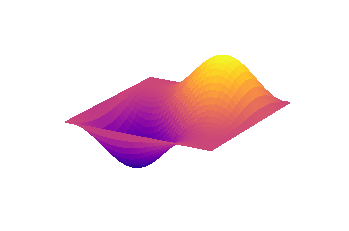

In [41]:
#add color
mycmap= cm.plasma

#plot 3D figure
# Z = (np.sin(X_mg)**2+np.cos(Y_mg))
Z = eigvect[:, shape_id].reshape(grid.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.grid(False)
ax.axis('off')
ax.plot_surface(X_mg, Y_mg, Z, linewidth=0, antialiased=False, cmap = mycmap)

In [14]:
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
# line, = ax.plot([], [], lw=3)

# def init():
#     line.set_data([], [])
#     return line,
# def animate(i):
#     x = np.linspace(0, 4, 1000)
#     y = np.sin(2*np.pi*(x-0.01*i))
#     line.set_data(x, y)
#     return line

# anim = FuncAnimation(fig, animate, init_func=init,
#                     frames=200, interval=20, blit=True)

# anim.save('coco.gif', writer='imagemagick')

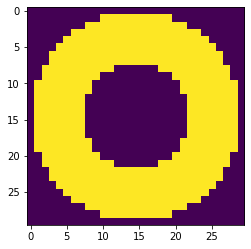

In [45]:
#mask (this are the equations for a "ring")
mask = np.zeros_like(Z)
mask[np.sqrt(X_mg**2+Y_mg**2)<1] = 1
mask[np.sqrt(X_mg**2+Y_mg**2)<0.5] = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mask)

In [30]:
def pol2cart(rho, phi):
    x = rho*np.cos(phi)
    y = rho*np.sin(phi)
    return [x,y]

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

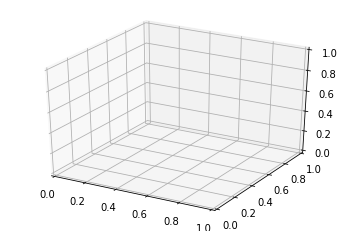

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

mycmap = cm.plasma
mycmap.set_under('k', alpha = 0)

Z_masked = Z.copy()
Z_masked[mask==0] = -1000

Z_min = np.min(Z)
Z_max = np.max(Z)

X_edge = []
Y_edge = []
Z_edge = []
for rho in np.linspace(0, 2*np.pi, num = 1000):
    x, y = pol2cart(1, rho)
    X_edge.append(x)
    Y_edge.append(y)
    Z_edge.append(np.sin(x)**2+np.cos(y))
    
    x, y = pol2cart(0.5, rho)
    X_edge.append(x)
    Y_edge.append(y)
    Z_edge.append(np.sin(x)**2+np.cos(y))
    
X1 = np.concatenate([X_mg.flatten(), X_edge], axis = 0)
Y1 = np.concatenate([Y_mg.flatten(), Y_edge], axis = 0)
Z1 = np.concatenate([Z_masked.flatten(), Z_edge], axis = 0)
    
ax.plot_trisurf(X1, Y1, Z1, vmin = Z_min, vmax = Z_max, cmap = mycmap, linewidth=0, antialiased = 0)
ax.set_zlim([Z_min, Z_max])